#E-commerce Customer Behavior

El estudio muestra el comportamiento de compradores a traves de E-Commerce. Se analizaran variables como edad, genero, ciudad de residencia, si dispone de membresia (descuento), total en us dolares gastado, entre otros.

**Identificación del cliente**:Categórico (Masculino, Femenino)

**Edad**: representa la edad del cliente, lo que permite obtener información específica del grupo de edad.
Ciudad:

**Tipo**: Indica la ciudad de residencia de cada cliente, proporcionando información geográfica.

**Av Rating**: Representa la calificación prom. otorgada por el cliente a los artículos comprados, midiendo la satisfacción.

**Membresía** (Oro, Plata, Bronce)
Descripción: Identifica el tipo de membresía que tiene el cliente, lo que influye en las ventajas y beneficios.
Gasto total:

**Total Gastado**: Registra el gasto monetario total del cliente en la plataforma de comercio electrónico.

**Artículos comprados**:número total de artículos adquiridos por el cliente.

**Puntuación** media:(0 a 5, con decimales)
Representa la calificación promedio otorgada por el cliente a los artículos comprados, midiendo su satisfacción.

**Descuento aplicado**: (Verdadero, Falso)
Descripción: Indica si se aplicó un descuento a la compra del cliente, influyendo en el comportamiento de compra.

**Días desde el último**Refleja el número de días transcurridos desde la compra más reciente del cliente, ayudando en el análisis de retención.

**Nivel de satisfacción**:(Satisfecho, Neutral, Insatisfecho)
Capta el nivel de satisfacción general del cliente, proporcionando una medida subjetiva de su experiencia.
////// /////

1. Para el analisis y generacion de dataframes se realiza descarga de libreria Pandas (pd)
2. El data frame utilizado es E-commerce_Customer_Behavior.csv

In [1]:
import pandas as pd

In [4]:
df_ecom= pd.read_csv("/content/E-commerce.csv")

In [5]:
df_ecom.info()
"Las variables a estudiar en este data frame"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


'Las variables a estudiar en este data frame'

Otras librearias que permitiran realizar graficas a partir de los datos.

```Descargar:

In [6]:
import matplotlib. pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings

%matplotlib inline

1. No de compradores por genero:
La muestra se realizo en Hombres (50%) y mujeres (50%)
Total Muestra: 350

<Axes: xlabel='Gender', ylabel='Count'>

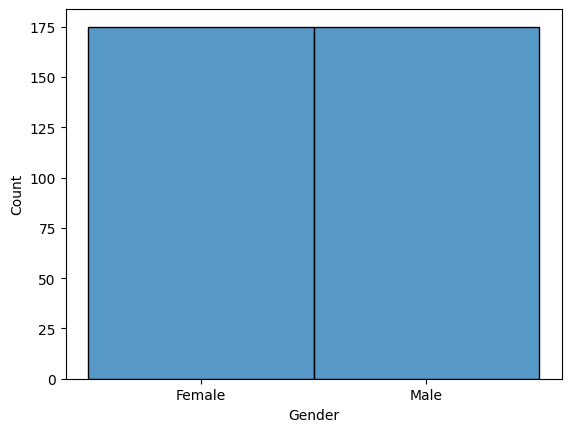

In [7]:
sns.histplot(df_ecom["Gender"])

2. Conozcamos algunos promedios del estudio realizado:

In [8]:
print("edad prom. de la muestra:")
df_ecom['Age'].mean()

edad prom. de la muestra:


33.597142857142856

In [9]:
print("Objetos prom. comprados:")
df_ecom['Items Purchased'].mean()

Objetos prom. comprados:


12.6

In [10]:

print("Gasto Promedio:")
df_ecom['Total Spend'].mean()


Gasto Promedio:


845.3817142857142

In [11]:
corrmat = df_ecom.corr()

<ipython-input-11-ad626c308c29>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df_ecom.corr()


In [15]:
corrmat

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase
Customer ID,1.000000,0.011171,-0.006316,-0.003230,-0.000510,-0.000707,0.117940
Age,0.011171,1.000000,-0.677918,-0.685274,-0.722277,0.056979,0.168763
Total Spend,-0.006316,-0.677918,1.000000,0.972425,0.941475,-0.160723,-0.540089
Items Purchased,-0.003230,-0.685274,0.972425,1.000000,0.922028,-0.114285,-0.420393
Average Rating,-0.000510,-0.722277,0.941475,0.922028,1.000000,-0.068507,-0.430757
Discount Applied,-0.000707,0.056979,-0.160723,-0.114285,-0.068507,1.000000,0.759543
Days Since Last Purchase,0.117940,0.168763,-0.540089,-0.420393,-0.430757,0.759543,1.000000


**Ejemplo Correlacion de variables**: av rating/total spend.
A mayor calificacion (satisfaccion) de los porductos comprados por el cliente, mayor es el gasto.



In [18]:
var= "Average Rating"
data = pd.concat([df_ecom['Total Spend'], df_ecom[var]], axis=1)
data.head(20)



,Total Spend,Average Rating
0,1120.20,4.6
1,780.50,4.1
2,510.75,3.4
3,1480.30,4.7
4,720.40,4.0
5,440.80,3.1
6,1150.60,4.5
7,800.90,4.2
8,495.25,3.6
9,1520.10,4.8


**Grafica**

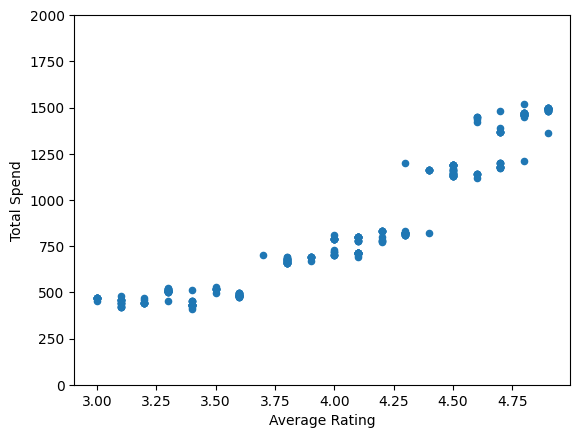

In [21]:
data.plot.scatter(x=var , y='Total Spend', ylim=(0,2000));